## Mini Project 02- Cardiotocography

Dataset:
- Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [ https://archive.ics.uci.edu/ml/datasets/Cardiotocography ]. Irvine, CA: University of California, School of Information and Computer Science.

Sources:
- Marques de SÃ¡, J.P., jpmdesa '@' gmail.com, Biomedical Engineering Institute, Porto, Portugal.
- Bernardes, J., joaobern '@' med.up.pt, Faculty of Medicine, University of Porto, Portugal.
- Ayres de Campos, D., sisporto '@' med.up.pt, Faculty of Medicine, University of Porto, Portugal.

Relevant Papers:
- Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318

*Import libraries*

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import db_dtypes
from pathlib import Path

from IPython.display import display, HTML
import pymongo
from pymongo import MongoClient

from datetime import datetime, timedelta
import os
from scipy import stats
import random

import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
import warnings
from pandas import ExcelFile  # Nb. Need to install xlrd from conda (it does not automatically install with pandas)

from sklearn import svm
from sklearn.datasets import make_blobs

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import time

from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

%matplotlib inline

### Exploratory Data Analysis (EDA)

In [42]:
dfCardio = pd.read_excel('CTG.xls', sheet_name = 1, skiprows= [0])
dfCardio

,b,e,AC,FM,UC,DL,DS,DP,DR,Unnamed: 9,...,E,AD,DE,LD,FS,SUSP,Unnamed: 42,CLASS,Unnamed: 44,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,NaN,9.0,NaN,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,2.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1576.0,3049.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,NaN,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,5.0,NaN,2.0
2125,2796.0,3415.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,1.0,NaN,1.0
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,...,72.0,332.0,252.0,107.0,69.0,197.0,NaN,NaN,NaN,NaN


In [43]:
dfCardio.columns

Index(['b', 'e', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'DR', 'Unnamed: 9', 'LB',
       'AC.1', 'FM.1', 'UC.1', 'DL.1', 'DS.1', 'DP.1', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency', 'Unnamed: 31', 'A', 'B', 'C', 'D',
       'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'Unnamed: 42', 'CLASS',
       'Unnamed: 44', 'NSP'],
      dtype='object')

In [44]:
dfCardio.drop([2126,2127,2128], inplace= True)

In [45]:
dfCardio.drop(['Unnamed: 9', 'Unnamed: 31', 'Unnamed: 42', 'Unnamed: 44'], axis= 1, inplace= True)

In [46]:
compression_opts = dict(method='zip',
                        archive_name='cardioDataFrame.csv')  
dfCardio.to_csv('cardioDataFrame.zip', index=False,
          compression=compression_opts)  

In [47]:
filepath = Path('cardioDataFrame.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
dfCardio.to_csv(filepath)

In [48]:
dfCardio.head()

,b,e,AC,FM,UC,DL,DS,DP,DR,LB,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,9.0,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,132.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,133.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,134.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,132.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,1.0


In [49]:
dfCardio.shape

(2126, 42)

In [50]:
dfCardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 42 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   b         2126 non-null   float64
 1   e         2126 non-null   float64
 2   AC        2126 non-null   float64
 3   FM        2126 non-null   float64
 4   UC        2126 non-null   float64
 5   DL        2126 non-null   float64
 6   DS        2126 non-null   float64
 7   DP        2126 non-null   float64
 8   DR        2126 non-null   float64
 9   LB        2126 non-null   float64
 10  AC.1      2126 non-null   float64
 11  FM.1      2126 non-null   float64
 12  UC.1      2126 non-null   float64
 13  DL.1      2126 non-null   float64
 14  DS.1      2126 non-null   float64
 15  DP.1      2126 non-null   float64
 16  ASTV      2126 non-null   float64
 17  MSTV      2126 non-null   float64
 18  ALTV      2126 non-null   float64
 19  MLTV      2126 non-null   float64
 20  Width     2126 non-null   floa

In [51]:
dfCardio.isna().sum()

b           0
e           0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
DR          0
LB          0
AC.1        0
FM.1        0
UC.1        0
DL.1        0
DS.1        0
DP.1        0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

In [52]:
dfCardio['DR'][0:10]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: DR, dtype: float64

In [53]:
dfCardio['DR'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2126 entries, 0 to 2125
Series name: DR
Non-Null Count  Dtype  
--------------  -----  
2126 non-null   float64
dtypes: float64(1)
memory usage: 16.7 KB


**Correlation**

In [54]:
dfCardioCorr= dfCardio.drop('DR', axis= 1)

In [55]:
corr= dfCardioCorr.corr()
corr.style.background_gradient(cmap='coolwarm')

,b,e,AC,FM,UC,DL,DS,DP,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,A,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
b,1.000000,0.944912,-0.038359,-0.133849,0.225595,0.091783,0.063977,0.091688,-0.020400,-0.011835,-0.135115,0.305153,0.113114,0.064744,0.083549,-0.126355,0.040505,-0.109861,-0.100027,-0.068933,0.048558,-0.069657,-0.070227,0.023108,-0.034576,-0.082295,-0.071608,0.054851,-0.033067,0.050155,-0.016470,0.021245,-0.071332,-0.027566,0.089531,0.069631,0.087735,-0.125821,-0.167353,-0.080930,-0.110756
e,0.944912,1.000000,0.071572,-0.119249,0.386856,0.163257,0.068221,0.111917,-0.013979,0.019061,-0.142881,0.317940,0.114579,0.067942,0.074634,-0.066374,0.044605,-0.104566,-0.108141,-0.027059,0.022379,-0.021877,-0.028026,0.017117,-0.016790,-0.077542,-0.052254,0.052357,-0.025311,0.021596,0.018013,-0.038732,-0.082700,-0.015549,0.138695,0.043638,0.092371,-0.148302,-0.172476,-0.081097,-0.117499
AC,-0.038359,0.071572,1.000000,0.053956,0.212100,-0.011350,-0.039341,-0.110317,-0.077967,0.914515,0.028594,0.081216,-0.088803,-0.039836,-0.122479,-0.197985,0.191378,-0.345162,-0.128901,0.291516,-0.157447,0.373493,0.191475,-0.011430,0.221693,0.236811,0.250729,0.111981,0.032235,-0.315433,0.467663,-0.113805,0.328854,-0.116153,0.264657,-0.255090,-0.140998,-0.140062,-0.238009,-0.255205,-0.340394
FM,-0.133849,-0.119249,0.053956,1.000000,-0.036626,0.076283,-0.010328,0.205337,-0.033305,0.052991,0.936176,-0.054884,0.061836,-0.010251,0.208685,-0.116461,0.138061,-0.072214,0.021031,0.171448,-0.158422,0.111228,0.183904,-0.014632,-0.037492,-0.085718,-0.056281,0.177793,-0.000069,-0.077368,-0.053710,-0.022823,0.058019,-0.024547,0.113454,0.001145,0.089162,-0.003765,-0.033851,0.077805,0.060366
UC,0.225595,0.386856,0.212100,-0.036626,1.000000,0.339484,0.018405,0.152395,-0.127722,0.101098,-0.068620,0.837497,0.231293,0.014908,0.081067,-0.079651,0.232687,-0.247513,-0.106590,0.152990,-0.112597,0.146645,0.095512,0.022701,-0.077695,-0.169739,-0.111041,0.184188,-0.060995,-0.042272,0.023350,-0.097485,-0.029741,-0.026050,0.243954,0.084710,0.113672,-0.205653,-0.251330,-0.073465,-0.163295
DL,0.091783,0.163257,-0.011350,0.076283,0.339484,1.000000,0.121617,0.294068,-0.155908,-0.081127,0.047769,0.273193,0.922180,0.123664,0.228846,-0.037040,0.516901,-0.266298,-0.251442,0.520656,-0.539125,0.242187,0.393860,0.208487,-0.315463,-0.509446,-0.353878,0.515130,-0.000687,-0.263220,-0.321418,-0.090816,-0.112276,-0.108282,0.430801,0.446887,0.332372,-0.114025,-0.185229,0.395887,0.065328
DS,0.063977,0.068221,-0.039341,-0.010328,0.018405,0.121617,1.000000,0.019766,-0.053518,-0.043421,-0.010914,0.008576,0.111174,0.991418,0.012371,0.033949,0.034130,-0.030770,-0.037667,0.044880,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,-0.026985,-0.035162,-0.009190,-0.011439,-0.010761,-0.002107,-0.021077,0.212109,-0.010527,-0.018368,0.060861,0.131934
DP,0.091688,0.111917,-0.110317,0.205337,0.152395,0.294068,0.019766,1.000000,-0.117133,-0.126155,0.204446,0.115456,0.247042,0.016243,0.928330,0.053677,0.287548,-0.140133,-0.230849,0.282790,-0.291175,0.134254,0.240768,0.046320,-0.413445,-0.511503,-0.445473,0.487212,-0.205469,-0.127485,-0.166116,-0.043417,-0.054040,-0.050837,0.011579,0.032076,0.757766,-0.032578,-0.086773,0.269300,0.490626
LB,-0.020400,-0.013979,-0.077967,-0.033305,-0.127722,-0.155908,-0.053518,-0.117133,1.000000,-0.080862,-0.033350,-0.146372,-0.158845,-0.054799,-0.105236,0.305570,-0.279607,0.285630,-0.032091,-0.147679,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,-0.023075,-0.048750,-0.062894,0.005591,0.158350,-0.130368,-0.030849,-0.122136,0.069885,0.283783,0.143001,0.148151
AC.1,-0.011835,0.019061,0.914515,0.052991,0.101098,-0.081127,-0.043421,-0.126155,-0.080862,1.000000,0.046949,0.086653,-0.110934,-0.043733,-0.131007,-0.280089,0.207595,-0.374335,-0.144876,0.298922,-0.154934,0.393712,0.189319,-0.006412,0.243845,0.270496,0.272948,0.126380,0.029341,-0.330025,0.49

In [56]:
corr01 = dfCardioCorr.corrwith(dfCardioCorr['NSP'], axis = 0)
corr_short = corr01[(corr01 != 1.0)&((corr01 > 0.4)|(corr01 < -0.4))]
new_dfCardio01 = dfCardioCorr[corr_short.index.tolist()]
new_dfCardio01.head()

,DP,DP.1,ASTV,ALTV,LD,FS,CLASS
0,0.0,0.0,73.0,43.0,-1.0,1.0,9.0
1,0.0,0.0,17.0,0.0,-1.0,-1.0,6.0
2,0.0,0.0,16.0,0.0,-1.0,-1.0,6.0
3,0.0,0.0,16.0,0.0,-1.0,-1.0,6.0
4,0.0,0.0,16.0,0.0,-1.0,-1.0,2.0


In [57]:
new_dfCardio01.shape

(2126, 7)

In [58]:
y = dfCardio['NSP'].values

In [59]:
target_df= pd.DataFrame(y, columns= ['target'])
target_df

,target
0,2.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
2121,2.0
2122,2.0
2123,2.0
2124,2.0


In [60]:
new_Cardio= pd.concat([new_dfCardio01, target_df], axis=1)
new_Cardio

,DP,DP.1,ASTV,ALTV,LD,FS,CLASS,target
0,0.0,0.0,73.0,43.0,-1.0,1.0,9.0,2.0
1,0.0,0.0,17.0,0.0,-1.0,-1.0,6.0,1.0
2,0.0,0.0,16.0,0.0,-1.0,-1.0,6.0,1.0
3,0.0,0.0,16.0,0.0,-1.0,-1.0,6.0,1.0
4,0.0,0.0,16.0,0.0,-1.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...
2121,0.0,0.0,79.0,25.0,-1.0,-1.0,5.0,2.0
2122,0.0,0.0,78.0,22.0,-1.0,-1.0,5.0,2.0
2123,0.0,0.0,79.0,20.0,-1.0,-1.0,5.0,2.0
2124,0.0,0.0,78.0,27.0,-1.0,-1.0,5.0,2.0


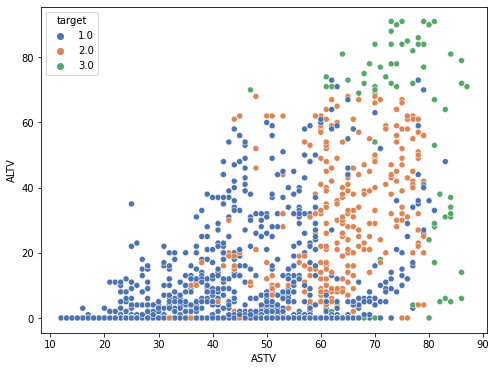

In [61]:
plt.figure(figsize =(8, 6))

sns.scatterplot(data= new_Cardio, x= new_Cardio['ASTV'], y= new_Cardio['ALTV'], hue= 'target', palette= 'deep')
# which method 'plots' all the features in 'pairs'? Hint: Check the Seaborn library.
plt.show()

### Define Target and select Predictor features

In [62]:
predictor_columns = [c for c in dfCardio.columns if c != 'NSP']

In [63]:
X= pd.DataFrame(dfCardio, columns = predictor_columns)
# X= new_dfCardio01
# X= new_dfCardio02
X.head()

,b,e,AC,FM,UC,DL,DS,DP,DR,LB,...,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,9.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,132.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,133.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,134.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,132.0,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0


In [64]:
# scaler = StandardScaler()
# X2.iloc[:, :]= scaler.fit_transform(X2.iloc[:, :])
# X2.head()

In [65]:
y = dfCardio['NSP']
y[0:10]

0    2.0
1    1.0
2    1.0
3    1.0
4    1.0
5    3.0
6    3.0
7    3.0
8    3.0
9    3.0
Name: NSP, dtype: float64

**Recurcive Feature Elimination**

In [66]:
# ANSWER
from sklearn.feature_selection import RFE

In [67]:
scaler = StandardScaler()
scaled_X= scaler.fit_transform(X)

In [68]:
X.columns

Index(['b', 'e', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'DR', 'LB', 'AC.1',
       'FM.1', 'UC.1', 'DL.1', 'DS.1', 'DP.1', 'ASTV', 'MSTV', 'ALTV', 'MLTV',
       'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median',
       'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS',
       'SUSP', 'CLASS'],
      dtype='object')

In [69]:
scaled_X.shape

(2126, 41)

In [70]:
scaled_dfX= pd.DataFrame(scaled_X, columns= X.columns)
scaled_dfX

,b,e,AC,FM,UC,DL,DS,DP,DR,LB,...,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS
0,-0.714239,-1.446091,-0.764740,-0.195096,-1.285798,-0.628375,-0.057476,-0.27153,0.0,-1.352220,...,-0.611778,-0.159896,-0.19902,-0.187226,-0.430188,-0.366704,-0.23021,5.459999,-0.319571,1.483764
1,-0.977139,-1.150615,0.358852,-0.195096,0.119475,0.172060,-0.057476,-0.27153,0.0,-0.132526,...,-0.611778,-0.159896,-0.19902,-0.187226,2.324568,-0.366704,-0.23021,-0.183150,-0.319571,0.492412
2,-0.784718,-0.992669,-0.202944,-0.195096,0.470793,0.172060,-0.057476,-0.27153,0.0,-0.030884,...,-0.611778,-0.159896,-0.19902,-0.187226,2.324568,-0.366704,-0.23021,-0.183150,-0.319571,0.492412
3,-0.522937,-0.548917,-0.202944,-0.195096,0.822111,0.172060,-0.057476,-0.27153,0.0,0.070757,...,-0.611778,-0.159896,-0.19902,-0.187226,2.324568,-0.366704,-0.23021,-0.183150,-0.319571,0.492412
4,-0.386452,-0.597268,0.358852,-0.195096,0.470793,-0.628375,-0.057476,-0.27153,0.0,-0.132526,...,1.634579,-0.159896,-0.19902,-0.187226,-0.430188,-0.366704,-0.23021,-0.183150,-0.319571,-0.829391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,1.320723,1.250803,-0.764740,-0.195096,0.822111,-0.628375,-0.057476,-0.27153,0.0,0.680604,...,-0.611778,-0.159896,-0.19902,5.341140,-0.430188,-0.366704,-0.23021,-0.183150,-0.319571,0.161961
2122,0.780378,1.250803,-0.483842,-0.195096,1.876065,-0.628375,-0.057476,-0.27153,0.0,0.680604,...,-0.611778,-0.159896,-0.19902,5.341140,-0.430188,-0.366704,-0.23021,-0.183150,-0.319571,0.161961
2123,0.780378,0.959625,-0.483842,-0.195096,1.173429,-0.628375,-0.057476,-0.27153,0.0,0.680604,...,-0.611778,-0.159896,-0.19902,5.341140,-0.430188,-0.366704,-0.23021,-0.183150,-0.319571,0.161961
2124,0.780378,1.446355,-0.483842,-0.195096,1.876065,-0.628375,-0.057476,-0.27153,0.0,0.680604,...,-0.611778,-0.159896,-0.19902,5.341140,-0.430188,-0.366704,-0.23021,-0.183150,-0.319571,0.161961


In [71]:
estimator = LogisticRegression(max_iter= 1000)
rfeModel = RFE(estimator, n_features_to_select= 5, step= 1)
rfeModel.fit_transform(scaled_dfX, y)
new_RFE= rfeModel.fit_transform(scaled_dfX, y)

In [72]:
rfeModel.ranking_

array([18,  8, 25, 29,  7, 13, 28,  3, 37,  2,  1, 32,  6, 23, 31, 19, 15,
       35,  5, 33, 14, 26, 21, 22, 34, 10,  1, 20, 12, 36, 24, 17, 27, 30,
        9, 16, 11,  1,  1,  4,  1])

In [73]:
new_RFE

array([[-0.82140279,  0.15326971, -0.23020976,  5.45999947,  1.48376361],
       [ 0.8318261 ,  0.08912573, -0.23020976, -0.1831502 ,  0.49241181],
       [ 0.0395395 ,  0.02498176, -0.23020976, -0.1831502 ,  0.49241181],
       ...,
       [-0.56734041,  0.85885344, -0.23020976, -0.1831502 ,  0.16196121],
       [-0.64547365,  0.79470947, -0.23020976, -0.1831502 ,  0.16196121],
       [-0.40275396,  0.53813356, -0.23020976, -0.1831502 , -1.15984119]])

In [74]:
rfeCol= rfeModel.get_feature_names_out()
rfeCol

array(['AC.1', 'Mean', 'LD', 'FS', 'CLASS'], dtype=object)

In [75]:
dfRFE= pd.DataFrame(new_RFE, columns= rfeCol)
dfRFE

,AC.1,Mean,LD,FS,CLASS
0,-0.821403,0.153270,-0.23021,5.459999,1.483764
1,0.831826,0.089126,-0.23021,-0.183150,0.492412
2,0.039539,0.024982,-0.23021,-0.183150,0.492412
3,-0.157783,-0.039162,-0.23021,-0.183150,0.492412
4,0.866829,0.089126,-0.23021,-0.183150,-0.829391
...,...,...,...,...,...
2121,-0.821403,0.987141,-0.23021,-0.183150,0.161961
2122,-0.620672,0.858853,-0.23021,-0.183150,0.161961
2123,-0.567340,0.858853,-0.23021,-0.183150,0.161961
2124,-0.645474,0.794709,-0.23021,-0.183150,0.161961


In [76]:
new_dfRFE= pd.concat([dfRFE, target_df], axis=1)
new_dfRFE

,AC.1,Mean,LD,FS,CLASS,target
0,-0.821403,0.153270,-0.23021,5.459999,1.483764,2.0
1,0.831826,0.089126,-0.23021,-0.183150,0.492412,1.0
2,0.039539,0.024982,-0.23021,-0.183150,0.492412,1.0
3,-0.157783,-0.039162,-0.23021,-0.183150,0.492412,1.0
4,0.866829,0.089126,-0.23021,-0.183150,-0.829391,1.0
...,...,...,...,...,...,...
2121,-0.821403,0.987141,-0.23021,-0.183150,0.161961,2.0
2122,-0.620672,0.858853,-0.23021,-0.183150,0.161961,2.0
2123,-0.567340,0.858853,-0.23021,-0.183150,0.161961,2.0
2124,-0.645474,0.794709,-0.23021,-0.183150,0.161961,2.0


<Figure size 576x432 with 0 Axes>

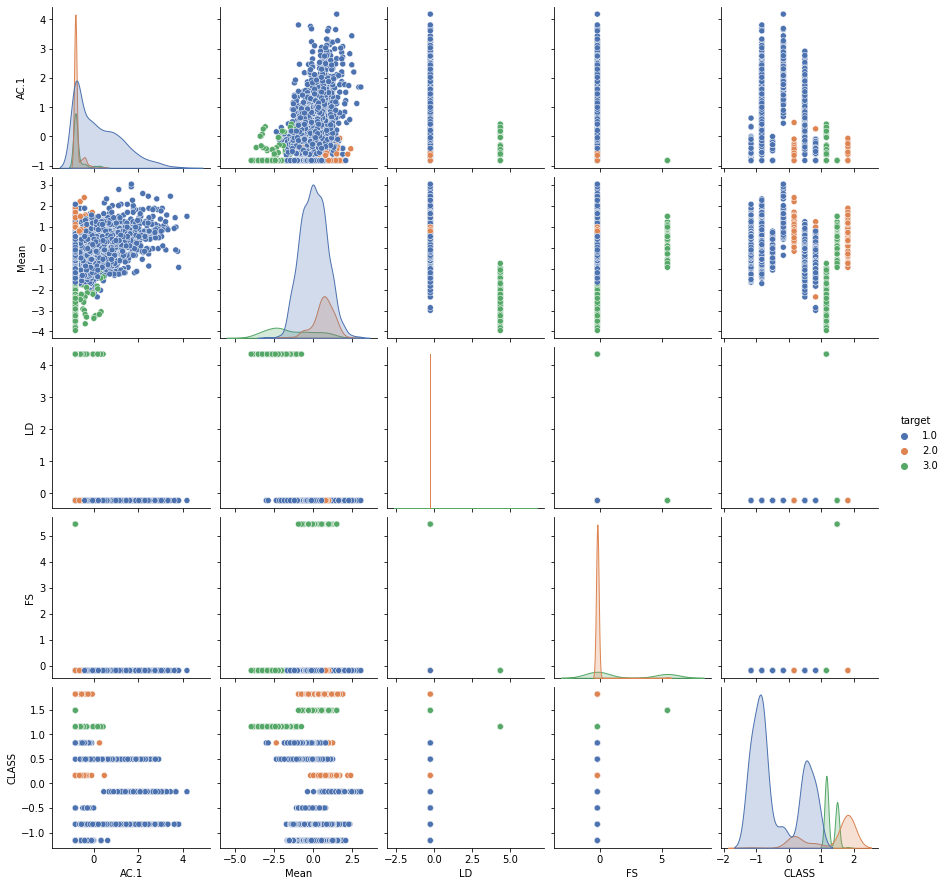

In [77]:
plt.figure(figsize =(8, 6))

sns.pairplot(new_dfRFE, hue= 'target', palette= 'deep')
# which method 'plots' all the features in 'pairs'? Hint: Check the Seaborn library.
plt.show()

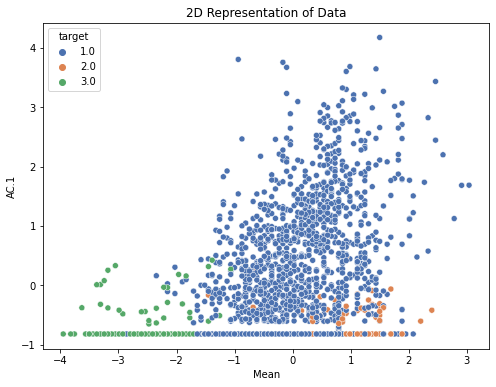

In [78]:
plt.figure(figsize =(8, 6))

sns.scatterplot(data= new_dfRFE, x= new_dfRFE['Mean'], y= new_dfRFE['AC.1'],
                hue= 'target', palette= 'deep').set(title='2D Representation of Data')
# which method 'plots' all the features in 'pairs'? Hint: Check the Seaborn library.
plt.savefig('image01.png', facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
plt.show()

In [79]:
def accumulativeFeatureScore(predictor, target):
    X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size = 0.2, random_state= 1)
    model = LogisticRegression(max_iter= 1000)
    included= []
    accScore_list = []
    excluded = list(set(predictor.columns) - set(included))

    for new_column in excluded:
#         print(new_column)
#         print(included + [new_column])
        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
        # calculate the score (R^2 for Regression)
        accScore = fit.score(X_train[included + [new_column]], y_train) # calculate the score
        accScore_list.append(accScore)
        included.append(new_column)

    return [accScore_list, included] 

In [80]:
%%time
accumFeatureSel= accumulativeFeatureScore(dfRFE, y)

CPU times: total: 109 ms
Wall time: 111 ms


In [81]:
featureCol= accumFeatureSel[1]
featureCol

['CLASS', 'LD', 'FS', 'AC.1', 'Mean']

In [82]:
new_X= pd.DataFrame(dfRFE, columns = featureCol)
new_X

,CLASS,LD,FS,AC.1,Mean
0,1.483764,-0.23021,5.459999,-0.821403,0.153270
1,0.492412,-0.23021,-0.183150,0.831826,0.089126
2,0.492412,-0.23021,-0.183150,0.039539,0.024982
3,0.492412,-0.23021,-0.183150,-0.157783,-0.039162
4,-0.829391,-0.23021,-0.183150,0.866829,0.089126
...,...,...,...,...,...
2121,0.161961,-0.23021,-0.183150,-0.821403,0.987141
2122,0.161961,-0.23021,-0.183150,-0.620672,0.858853
2123,0.161961,-0.23021,-0.183150,-0.567340,0.858853
2124,0.161961,-0.23021,-0.183150,-0.645474,0.794709


In [83]:
accumFeatureSel[0][0:10]

[0.8670588235294118,
 0.9205882352941176,
 0.9511764705882353,
 0.9511764705882353,
 0.9629411764705882]

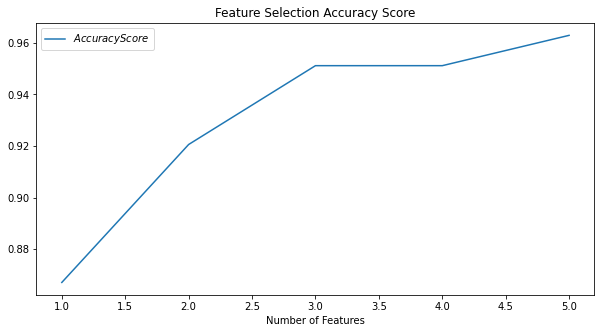

In [84]:
## Chart both R^2 and Adjusted R^2
_range = range(1, len(accumFeatureSel[0])+1)

# define chart size
plt.figure(figsize = (10, 5))
# plot each metric 
plt.plot(_range, accumFeatureSel[0], label = '$Accuracy Score$')
# add some better visualisation
plt.xlabel('Number of Features')
plt.title('Feature Selection Accuracy Score')
plt.legend()
plt.savefig('accScoreCardio.png', facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
# output the chart
plt.savefig('image02.png', facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
plt.show()

**Forward Feature Selection**

In [85]:
def forwardFeatureSel(predictor, target):
    X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size = 0.2, random_state= 1)
    scaler = StandardScaler()
    scaled_Xtrain= scaler.fit_transform(X_train)
    scaled_Xtest= scaler.transform(X_test)
    
    ## Flag intermediate output
    show_steps = True   # for testing/debugging
    # show_steps = False  # without showing steps
    
    ## Use Forward Feature Selection to pick a good model
    # start with no predictors
    included = []
    # keep track of model and parameters
    best = {'feature': '', 'r2': 0, 'a_r2': 0}
    # create a model object to hold the modelling parameters
    model = LogisticRegression(max_iter= 1000)
    # get the number of cases in the training data
    n = X_train.shape[0]
#     n = scaled_Xtrain.shape[0]

    r2_list = []
    adjusted_r2_list = []

    while True:
        changed = False

        if show_steps:
            print('') 

        # list the features to be evaluated
        excluded = list(set(predictor.columns) - set(included))
    #     print([included + [new_column]])
        if show_steps:
            print('(Step) Excluded = %s' % ', '.join(excluded))  

        # for each remaining feature to be evaluated
        for new_column in excluded:
            if show_steps:
                print('(Step) Trying %s...' % new_column)
                print('(Step) - Features = %s' % ', '.join(included + [new_column]))

            # fit the model with the Training data
            fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
            # calculate the score (R^2 for Regression)
            r2 = fit.score(X_train[included + [new_column]], y_train) # calculate the score
            # number of predictors in this model
            k = len(included) + 1
            # calculate the adjusted R^2
            adjusted_r2 = 1 - (((1-r2)*(n-1))/(n-k-1)) # calculate the Adjusted R^2
    #         included.append(new_column)
    #         r2_list.append(r2)
    #         adjusted_r2_list.append(adjusted_r2)

            if show_steps:
                print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                      (adjusted_r2, best['a_r2']))

            # if model improves
            if adjusted_r2 > best['a_r2']:
                # record new parameters
                best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
                # flag that found a better model
                changed = True
                if show_steps:
                    print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                          (best['feature'], best['r2'], best['a_r2']))
        # END for

        # if found a better model after testing all remaining features
        if changed:
            # update control details
            included.append(best['feature'])
            r2_list.append(r2)
            adjusted_r2_list.append(adjusted_r2)
            excluded = list(set(excluded) - set(best['feature']))
            print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
                  (best['feature'], best['r2'], best['a_r2']))
        else:
            # terminate if no better model
            break

    print('')
    print('Resulting features:')
    print(', '.join(included))
    return [r2_list, adjusted_r2_list, included] 

## Optimal Parameters

### Logistic Regression

In [86]:
%%time
lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [1, 10, 100]
}

logReg = LogisticRegression(max_iter=1000, solver='liblinear')
reg = GridSearchCV(logReg, param_grid= lr_params)
regMod= reg.fit(new_X, y)
print(regMod)
sorted(regMod.cv_results_.keys())
regMod.cv_results_
print(regMod.best_estimator_)
regMod.best_score_

GridSearchCV(estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2']})
LogisticRegression(C=1, max_iter=1000, solver='liblinear')
CPU times: total: 406 ms
Wall time: 405 ms


0.963782380557857

### Support Vector Machine

In [87]:
%%time
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

svc = svm.SVC()
clf = GridSearchCV(svc, svc_params)
clfMod= clf.fit(new_X, y)
print(clfMod)
sorted(clfMod.cv_results_.keys())
clfMod.cv_results_
print(clfMod.best_estimator_)
clfMod.best_score_

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})
SVC(C=10, gamma=0.001, kernel='linear')
CPU times: total: 2.33 s
Wall time: 2.33 s


0.9623739298536316

## Logistic Regression

In [88]:
def logisticRegressionModel(predictors, target):
    X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.20, random_state= 1)
#     print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#     print(X_train[0:5])
    reg= LogisticRegression(max_iter= 1000, C= 1, solver= 'liblinear')
#     reg= LogisticRegression(max_iter= 1000, C= 100, penalty= 'l1', solver= 'liblinear')
    regMod= reg.fit(X_train, y_train)
    coefMod= regMod.coef_[0]
    interceptMod= regMod.intercept_[0]
    feature_cols= X_train.columns
    # feature_cols= dfBrCancer.iloc[:, 1:]
    # print(set(zip(feature_cols, model.coef_[0])))
    predictArr01= regMod.predict(X_test)
    predictProbDict= regMod.predict_proba(X_test)
    accScore= regMod.score(X_test, y_test)
    
    return X_train, X_test, y_train, y_test, coefMod, interceptMod, feature_cols, predictArr01, predictProbDict, accScore

### Accuracy Score

In [89]:
%%time
tic01= time.time()
logRegModel= logisticRegressionModel(new_X, y)
print('Accuracy Score:', logRegModel[9])
toc01= time.time()
runTimeLogistic= (toc01-tic01)*1000

Accuracy Score: 0.9788732394366197
CPU times: total: 0 ns
Wall time: 11 ms


In [90]:
print(set(zip(logRegModel[6], logRegModel[4])))

{('Mean', -2.1324174403817002), ('AC.1', 2.195499460431645), ('CLASS', -2.521969571908355), ('FS', -1.014684559699029), ('LD', -2.555931346963001)}


In [91]:
for col in zip(logRegModel[6], logRegModel[4]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

CLASS       -2.521970
LD          -2.555931
FS          -1.014685
AC.1        +2.195499
Mean        -2.132417


In [92]:
logRegModel[3]

669     1.0
1205    2.0
870     1.0
547     2.0
1806    1.0
       ... 
1292    1.0
1661    1.0
636     1.0
439     2.0
330     2.0
Name: NSP, Length: 426, dtype: float64

In [93]:
logRegModel[8]

array([[5.33202928e-01, 4.63010445e-01, 3.78662712e-03],
       [2.18649722e-02, 9.74008194e-01, 4.12683397e-03],
       [9.96954879e-01, 5.05516214e-04, 2.53960433e-03],
       ...,
       [9.60354560e-01, 3.73244850e-02, 2.32095452e-03],
       [1.92540104e-01, 8.04039575e-01, 3.42032113e-03],
       [3.26098329e-02, 9.63089870e-01, 4.30029722e-03]])

In [94]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MultiLabelBinarizer

In [95]:
y

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: NSP, Length: 2126, dtype: float64

In [96]:
%%time
# warnings.filterwarnings("ignore")
# Binarize the output
# y_mlb = MultiLabelBinarizer().fit_transform(y)
new_Y = label_binarize(y, classes=[1, 2, 3])
n_classes = new_Y.shape[1]

# Add noisy features to make the problem harder
# random_state = np.random.RandomState(1)
# n_samples, n_features = new_X.shape
# new_X = np.c_[new_X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(new_X, new_Y, test_size=0.2, random_state= 1)
scaler = StandardScaler()
scaled_Xtrain= scaler.fit_transform(X_train)
# scaled_X= scaler.transform(new_X)
scaled_Xtest= scaler.transform(X_test)
# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    LogisticRegression(max_iter= 1000)
)
y_score = classifier.fit(scaled_Xtrain, y_train).predict_proba(scaled_Xtest)
# predictProbDict= classifier.predict_proba(X_test)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
#     print(i)
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

CPU times: total: 31.2 ms
Wall time: 27 ms


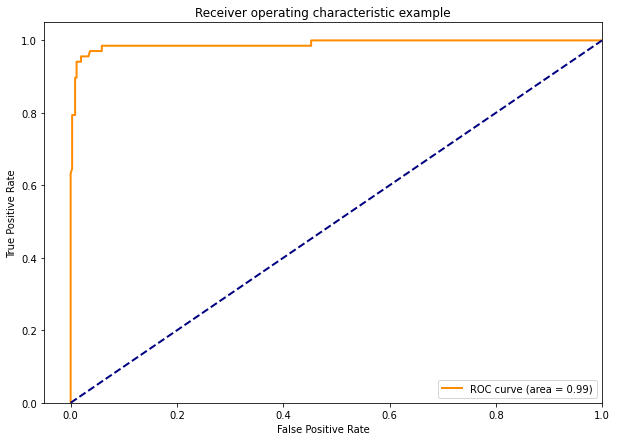

In [97]:
plt.figure(figsize=(10, 7))
lw = 2
plt.plot(
    fpr[1],
    tpr[1],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[1],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### Roc- Curve

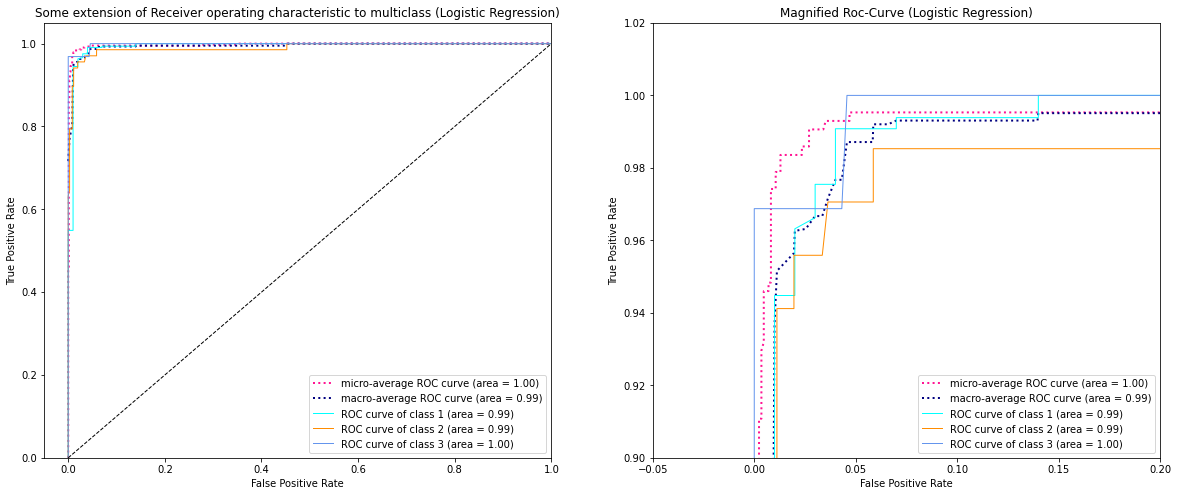

In [98]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(20, 8))

plt.subplot(121)
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=2,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=2,
)

lw= 1
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i+1, roc_auc[i]),
    )
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass (Logistic Regression)")
plt.legend(loc="lower right")

plt.subplot(122)
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=2,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=2,
)

lw= 1
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
# colors = cycle(["aqua", "darkorange", "red"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i+1, roc_auc[i]),
    )
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([-0.05, 0.2])
plt.ylim([0.9, 1.02])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Magnified Roc-Curve (Logistic Regression)")
plt.legend(loc="lower right")

plt.savefig('image03.png', facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
plt.show()

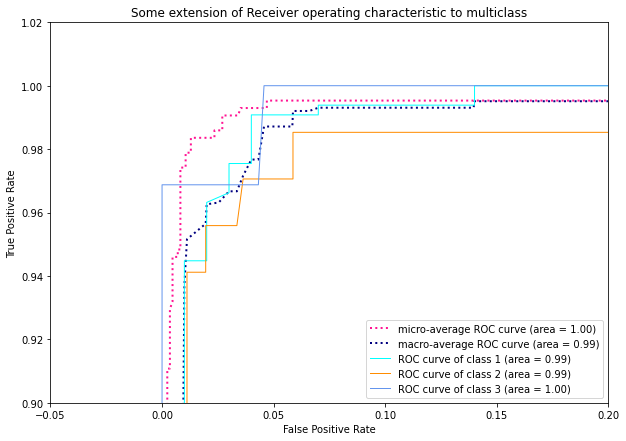

In [99]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 7))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=2,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=2,
)

lw= 1
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i+1, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([-0.05, 0.2])
plt.ylim([0.9, 1.02])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

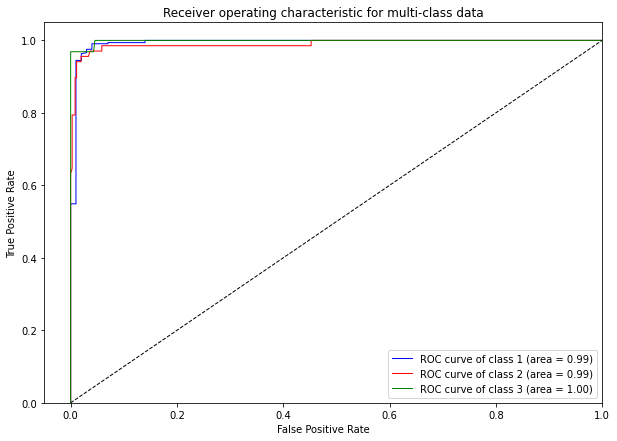

In [100]:
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix

In [101]:
y_pred_class01= logRegModel[7]
logConfuseMatrix= metrics.confusion_matrix(logRegModel[3], y_pred_class01)
print(logConfuseMatrix)

[[323   3   0]
 [  5  63   0]
 [  0   1  31]]


In [102]:
logClassReport= metrics.classification_report(logRegModel[3], y_pred_class01)
print(logClassReport)

              precision    recall  f1-score   support

         1.0       0.98      0.99      0.99       326
         2.0       0.94      0.93      0.93        68
         3.0       1.00      0.97      0.98        32

    accuracy                           0.98       426
   macro avg       0.98      0.96      0.97       426
weighted avg       0.98      0.98      0.98       426



In [103]:
logClassReportDict= metrics.classification_report(logRegModel[3], y_pred_class01, output_dict= True)
logClassReportDict['1.0']['precision']

0.9847560975609756

### 5- fold cross validation

In [104]:
reg= LogisticRegression(max_iter= 1000, random_state= 1)
crossValScoreLogistic = cross_val_score(reg, new_X, y, cv=5)
meanAccLogistic= np.mean(crossValScoreLogistic)
print(crossValScoreLogistic, meanAccLogistic)

[0.9600939  0.96235294 0.97882353 0.94823529 0.96941176] 0.9637834852250761


In [105]:
print(logClassReportDict['macro avg'])

arr01= []
for i in logClassReportDict['macro avg']:
    logClassMetric= logClassReportDict['macro avg'][i]
    arr01.append(logClassMetric)

arr01.append('logisticRegression')
arr01.append(runTimeLogistic)
arr01.append(meanAccLogistic)
arr01

{'precision': 0.975018201674554, 'recall': 0.962006044749188, 'f1-score': 0.9684093005193923, 'support': 426}


[0.975018201674554,
 0.962006044749188,
 0.9684093005193923,
 426,
 'logisticRegression',
 11.002779006958008,
 0.9637834852250761]

## Support Vector Machine (SVM)

In [106]:
new_X

,CLASS,LD,FS,AC.1,Mean
0,1.483764,-0.23021,5.459999,-0.821403,0.153270
1,0.492412,-0.23021,-0.183150,0.831826,0.089126
2,0.492412,-0.23021,-0.183150,0.039539,0.024982
3,0.492412,-0.23021,-0.183150,-0.157783,-0.039162
4,-0.829391,-0.23021,-0.183150,0.866829,0.089126
...,...,...,...,...,...
2121,0.161961,-0.23021,-0.183150,-0.821403,0.987141
2122,0.161961,-0.23021,-0.183150,-0.620672,0.858853
2123,0.161961,-0.23021,-0.183150,-0.567340,0.858853
2124,0.161961,-0.23021,-0.183150,-0.645474,0.794709


In [107]:
y

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: NSP, Length: 2126, dtype: float64

In [108]:
def svmRegressionModel(predictors, target):
    X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.20, random_state= 1)
#     print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#     print(X_train[0:5])
    clf= svm.SVC(kernel= 'linear', C= 10, gamma= 0.001, probability= True)
#     clf= svm.SVC(kernel= 'linear', C= 100, gamma= 0.001, probability= True)
    clfMod= clf.fit(X_train, y_train)
    coefMod= clfMod.coef_[0]
    interceptMod= clfMod.intercept_[0]
    feature_cols= X_train.columns
    # feature_cols= dfBrCancer.iloc[:, 1:]
    # print(set(zip(feature_cols, model.coef_[0])))
    predictArr01= clfMod.predict(X_test)
    predictProbDict= clfMod.predict_proba(X_test)
    accScore= clfMod.score(X_test, y_test)
    
    return X_train, X_test, y_train, y_test, coefMod, interceptMod, feature_cols, predictArr01, predictProbDict, accScore

### Accuracy Score

In [109]:
%%time
tic02= time.time()
svmRegModel= svmRegressionModel(new_X, y)
print('Accuracy Score:', svmRegModel[9])
toc02= time.time()
runTimeSVM= (toc02-tic02)*1000

Accuracy Score: 0.9788732394366197
CPU times: total: 93.8 ms
Wall time: 94.8 ms


### Confuson Matrix

In [110]:
y_pred_class02= svmRegModel[7]
svmConfuseMatrix= metrics.confusion_matrix(svmRegModel[3], y_pred_class02)
print(svmConfuseMatrix)

[[323   3   0]
 [  5  63   0]
 [  0   1  31]]


In [111]:
svmClassReport= metrics.classification_report(svmRegModel[3], y_pred_class02)
print(svmClassReport)

              precision    recall  f1-score   support

         1.0       0.98      0.99      0.99       326
         2.0       0.94      0.93      0.93        68
         3.0       1.00      0.97      0.98        32

    accuracy                           0.98       426
   macro avg       0.98      0.96      0.97       426
weighted avg       0.98      0.98      0.98       426



In [112]:
svmClassReportDict= metrics.classification_report(svmRegModel[3], y_pred_class02, output_dict= True)
svmClassReportDict['1.0']['precision']

0.9847560975609756

### 5- fold Cross Validation

In [113]:
%%time
clf= svm.SVC(kernel= 'linear', C= 10, gamma= 0.001, probability= False)
crossValScoreSVM = cross_val_score(clf, new_X, y, cv=5)
meanAccSVM= np.mean(crossValScoreSVM)
print(crossValScoreSVM, meanAccSVM)

[0.95539906 0.95764706 0.97882353 0.94823529 0.97176471] 0.9623739298536316
CPU times: total: 93.8 ms
Wall time: 93.8 ms


In [114]:
print(svmClassReportDict['macro avg'])

arr02= []
for i in svmClassReportDict['macro avg']:
    svmClassMetric= svmClassReportDict['macro avg'][i]
    arr02.append(svmClassMetric)

arr02.append('supportVectorMachine')
arr02.append(runTimeSVM)
arr02.append(meanAccSVM)
arr02

{'precision': 0.975018201674554, 'recall': 0.962006044749188, 'f1-score': 0.9684093005193923, 'support': 426}


[0.975018201674554,
 0.962006044749188,
 0.9684093005193923,
 426,
 'supportVectorMachine',
 94.79427337646484,
 0.9623739298536316]

In [115]:
def calculateRocAuc(X, y, model):
    new_Y = label_binarize(y, classes=[1, 2, 3])
    n_classes = new_Y.shape[1]
    X_train, X_test, y_train, y_test = train_test_split(X, new_Y, test_size=0.2, random_state= 1)
    scaler = StandardScaler()
    scaled_Xtrain= scaler.fit_transform(X_train)
    scaled_Xtest= scaler.transform(X_test)
    classifier = OneVsRestClassifier(model)
    y_score = classifier.fit(scaled_Xtrain, y_train).decision_function(scaled_Xtest)
    # predictProbDict= classifier.predict_proba(X_test)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
    #     print(i)
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(20, 8))
#     plt.figure(figsize=(10, 7))

    plt.subplot(121)
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=2,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=2,
    )
    
    lw= 1
    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw= lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(i+1, roc_auc[i]),
        )
    
    plt.plot([0, 1], [0, 1], "k--", lw= lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Some extension of Receiver operating characteristic to multiclass (SVM)")
    plt.legend(loc="lower right")
    
    plt.subplot(122)
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=2,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=2,
    )
    
    lw= 1
    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw= lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(i+1, roc_auc[i]),
        )
    
    plt.plot([0, 1], [0, 1], "k--", lw= lw)
    plt.xlim([-0.05, 0.2])
    plt.ylim([0.9, 1.02])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Magnified Roc-Curve (SVM)")
    plt.legend(loc="lower right")
    
    plt.savefig('image04.png', facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
    
    plt.show()
    return [n_classes, fpr, tpr, roc_auc, fpr['micro'], tpr['micro'], roc_auc['micro'],
            fpr['macro'], tpr['macro'], roc_auc['macro']]

### Roc- Curve

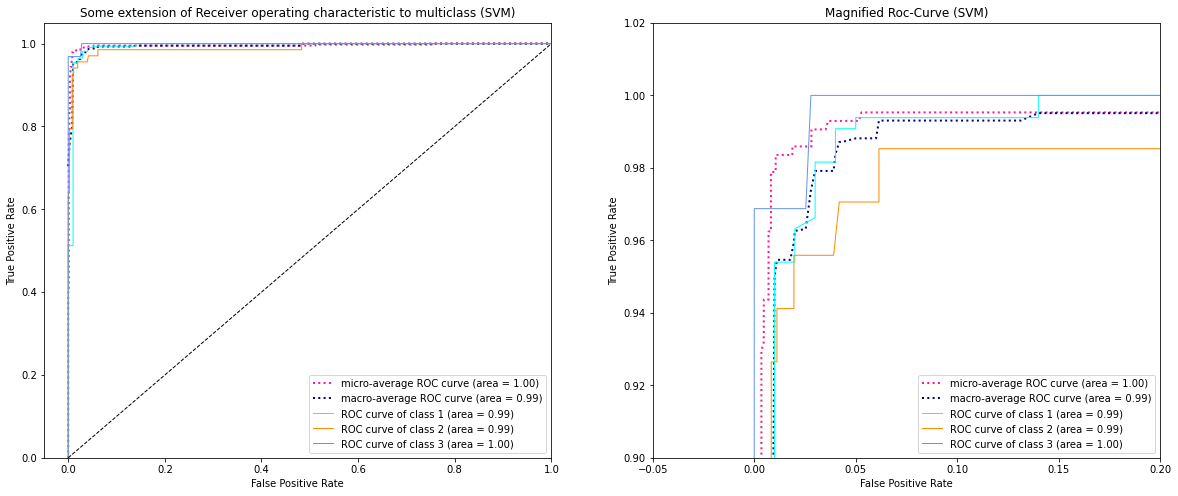

In [116]:
svmRocAucData= calculateRocAuc(new_X, y, clf)

In [117]:
svmRocAucData[0]

3

## Naive Bayes

In [118]:
new_X

,CLASS,LD,FS,AC.1,Mean
0,1.483764,-0.23021,5.459999,-0.821403,0.153270
1,0.492412,-0.23021,-0.183150,0.831826,0.089126
2,0.492412,-0.23021,-0.183150,0.039539,0.024982
3,0.492412,-0.23021,-0.183150,-0.157783,-0.039162
4,-0.829391,-0.23021,-0.183150,0.866829,0.089126
...,...,...,...,...,...
2121,0.161961,-0.23021,-0.183150,-0.821403,0.987141
2122,0.161961,-0.23021,-0.183150,-0.620672,0.858853
2123,0.161961,-0.23021,-0.183150,-0.567340,0.858853
2124,0.161961,-0.23021,-0.183150,-0.645474,0.794709


In [119]:
y

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: NSP, Length: 2126, dtype: float64

In [120]:
from sklearn.naive_bayes import BernoulliNB

In [121]:
def bernoulliRegressionModel(predictors, target):
    X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.20, random_state=1)
#     print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#     print(X_train[0:5])
    gnb= BernoulliNB()
    gnbMod= gnb.fit(X_train, y_train)
#     coefMod= gnbMod.coef_[0]
#     interceptMod= gnbMod.intercept_[0]
    feature_cols= X_train.columns
    # feature_cols= dfBrCancer.iloc[:, 1:]
    # print(set(zip(feature_cols, model.coef_[0])))
    predictArr01= gnbMod.predict(X_test)
    predictProbDict= gnbMod.predict_proba(X_test)
    accScore= gnbMod.score(X_test, y_test)
    
    return X_train, X_test, y_train, y_test, feature_cols, predictArr01, predictProbDict, accScore

### Accuracy Score

In [122]:
%%time
tic03= time.time()
gnbRegModel= bernoulliRegressionModel(new_X, y)
print('Accuracy Score:', gnbRegModel[7])
toc03= time.time()
runTimeGNB= (toc03-tic03)*1000

Accuracy Score: 0.9624413145539906
CPU times: total: 15.6 ms
Wall time: 6.98 ms


### Confusion Matrix

In [123]:
y_pred_class03= gnbRegModel[5]
gnbConfuseMatrix= metrics.confusion_matrix(gnbRegModel[3], y_pred_class03)
print(gnbConfuseMatrix)

[[317   9   0]
 [  6  62   0]
 [  0   1  31]]


In [124]:
gnbClassReport= metrics.classification_report(gnbRegModel[3], y_pred_class03)
print(gnbClassReport)

              precision    recall  f1-score   support

         1.0       0.98      0.97      0.98       326
         2.0       0.86      0.91      0.89        68
         3.0       1.00      0.97      0.98        32

    accuracy                           0.96       426
   macro avg       0.95      0.95      0.95       426
weighted avg       0.96      0.96      0.96       426



In [125]:
gnbClassReportDict= metrics.classification_report(gnbRegModel[3], y_pred_class03, output_dict= True)
gnbClassReportDict['1.0']['precision']

0.9814241486068112

### 5- fold Cross Validation

In [126]:
%%time
gnb= BernoulliNB()
crossValScoreGNB = cross_val_score(gnb, new_X, y, cv=5)
meanAccGNB= np.mean(crossValScoreGNB)
print(crossValScoreGNB, meanAccGNB)

[0.94835681 0.95529412 0.96941176 0.91294118 0.97647059] 0.9524948909141122
CPU times: total: 15.6 ms
Wall time: 23 ms


In [127]:
print(gnbClassReportDict['macro avg'])

arr03= []
for i in gnbClassReportDict['macro avg']:
    gnbClassMetric= gnbClassReportDict['macro avg'][i]
    arr03.append(gnbClassMetric)

arr03.append('naiveBayes')
arr03.append(runTimeGNB)
arr03.append(meanAccGNB)
arr03

{'precision': 0.9475117532393075, 'recall': 0.9509691146397209, 'f1-score': 0.9489095963672235, 'support': 426}


[0.9475117532393075,
 0.9509691146397209,
 0.9489095963672235,
 426,
 'naiveBayes',
 6.98089599609375,
 0.9524948909141122]

In [128]:
from sklearn.multiclass import OneVsOneClassifier

In [129]:
def gnbCalculateRocAuc(X, y, model):
    new_Y = label_binarize(y, classes=[1, 2, 3])
    n_classes = new_Y.shape[1]
    X_train, X_test, y_train, y_test = train_test_split(X, new_Y, test_size=0.2, random_state= 1)
    scaler = StandardScaler()
    scaled_Xtrain= scaler.fit_transform(X_train)
    scaled_Xtest= scaler.transform(X_test)
    classifier = OneVsRestClassifier(model)
    y_score = classifier.fit(scaled_Xtrain, y_train).predict_proba(scaled_Xtest)
    # predictProbDict= classifier.predict_proba(X_test)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
    #     print(i)
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(20, 8))
#     plt.figure(figsize=(10, 7))

    plt.subplot(121)
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=2,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=2,
    )
    
    lw= 1
    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw= lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(i+1, roc_auc[i]),
        )

    plt.plot([0, 1], [0, 1], "k--", lw= lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Some extension of Receiver operating characteristic to multiclass (Bernoulli)")
    plt.legend(loc="lower right")
    
    plt.subplot(122)
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=2,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=2,
    )
    
    lw= 1
    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw= lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(i+1, roc_auc[i]),
        )

    plt.plot([0, 1], [0, 1], "k--", lw= lw)
    plt.xlim([-0.05, 0.3])
    plt.ylim([0.8, 1.02])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Magnified Roc-Curve (Bernoulli)")
    plt.legend(loc="lower right")
    
    plt.savefig('image05.png', facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
    
    plt.show()
    return [n_classes, fpr, tpr, roc_auc, fpr['micro'], tpr['micro'], roc_auc['micro'],
            fpr['macro'], tpr['macro'], roc_auc['macro']]

### Roc- Curve

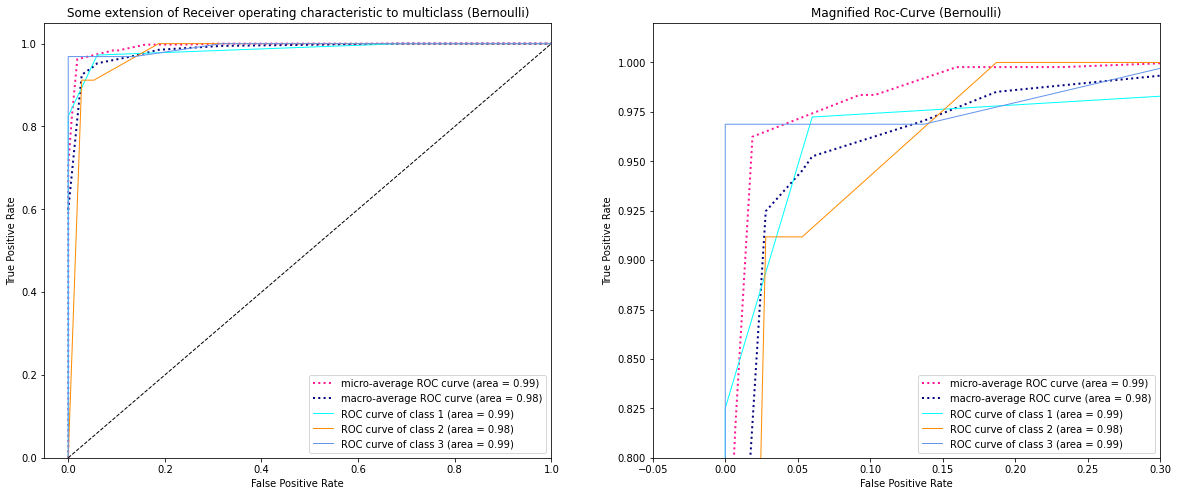

In [130]:
gnbRocAucData= gnbCalculateRocAuc(new_X, y, gnb)

In [131]:
gnbRocAucData[4:7]

[array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00704225, 0.01877934, 0.092723  , 0.10328638,
        0.15962441, 0.22300469, 0.22535211, 0.23239437, 0.3157277 ,
        0.36971831, 0.38615023, 0.45305164, 0.4600939 , 0.47065728,
        0.49765258, 0.51408451, 0.54107981, 0.64671362, 0.64906103,
        0.73943662, 0.80633803, 0.90962441, 1.        ]),
 array([0.        , 0.10328638, 0.28403756, 0.31690141, 0.42253521,
        0.55633803, 0.57042254, 0.62441315, 0.62910798, 0.68309859,
        0.70422535, 0.81690141, 0.96244131, 0.98356808, 0.98356808,
        0.99765258, 0.99765258, 0.99765258, 0.99765258, 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        ]),
 0.99405155502656]

## Comparison Roc- Curve

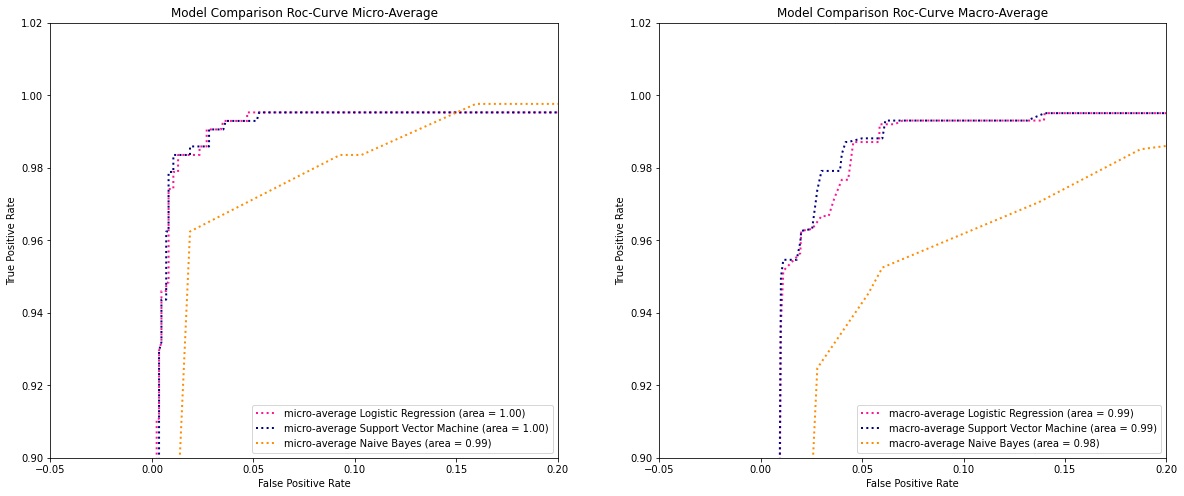

In [132]:
# Plot all ROC curves
plt.figure(figsize=(20, 8))
#     plt.figure(figsize=(10, 7))

plt.subplot(121)
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average Logistic Regression (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=2,
)

plt.plot(
    svmRocAucData[4],
    svmRocAucData[5],
    label="micro-average Support Vector Machine (area = {0:0.2f})".format(svmRocAucData[6]),
    color="navy",
    linestyle=":",
    linewidth=2,
)

plt.plot(
    gnbRocAucData[4],
    gnbRocAucData[5],
    label="micro-average Naive Bayes (area = {0:0.2f})".format(gnbRocAucData[6]),
    color="darkorange",
    linestyle=":",
    linewidth=2,
)

plt.plot([0, 1], [0, 1], "k--", lw= lw)
plt.xlim([-0.05, 0.2])
plt.ylim([0.9, 1.02])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Model Comparison Roc-Curve Micro-Average")
plt.legend(loc="lower right")

plt.subplot(122)
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average Logistic Regression (area = {0:0.2f})".format(roc_auc["macro"]),
    color="deeppink",
    linestyle=":",
    linewidth=2,
)

plt.plot(
    svmRocAucData[7],
    svmRocAucData[8],
    label="macro-average Support Vector Machine (area = {0:0.2f})".format(svmRocAucData[9]),
    color="navy",
    linestyle=":",
    linewidth=2,
)

plt.plot(
    gnbRocAucData[7],
    gnbRocAucData[8],
    label="macro-average Naive Bayes (area = {0:0.2f})".format(gnbRocAucData[9]),
    color="darkorange",
    linestyle=":",
    linewidth=2,
)

plt.plot([0, 1], [0, 1], "k--", lw= lw)
plt.xlim([-0.05, 0.2])
plt.ylim([0.9, 1.02])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Model Comparison Roc-Curve Macro-Average")
plt.legend(loc="lower right")

plt.savefig('image06.png', facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

plt.show()

In [133]:
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [134]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

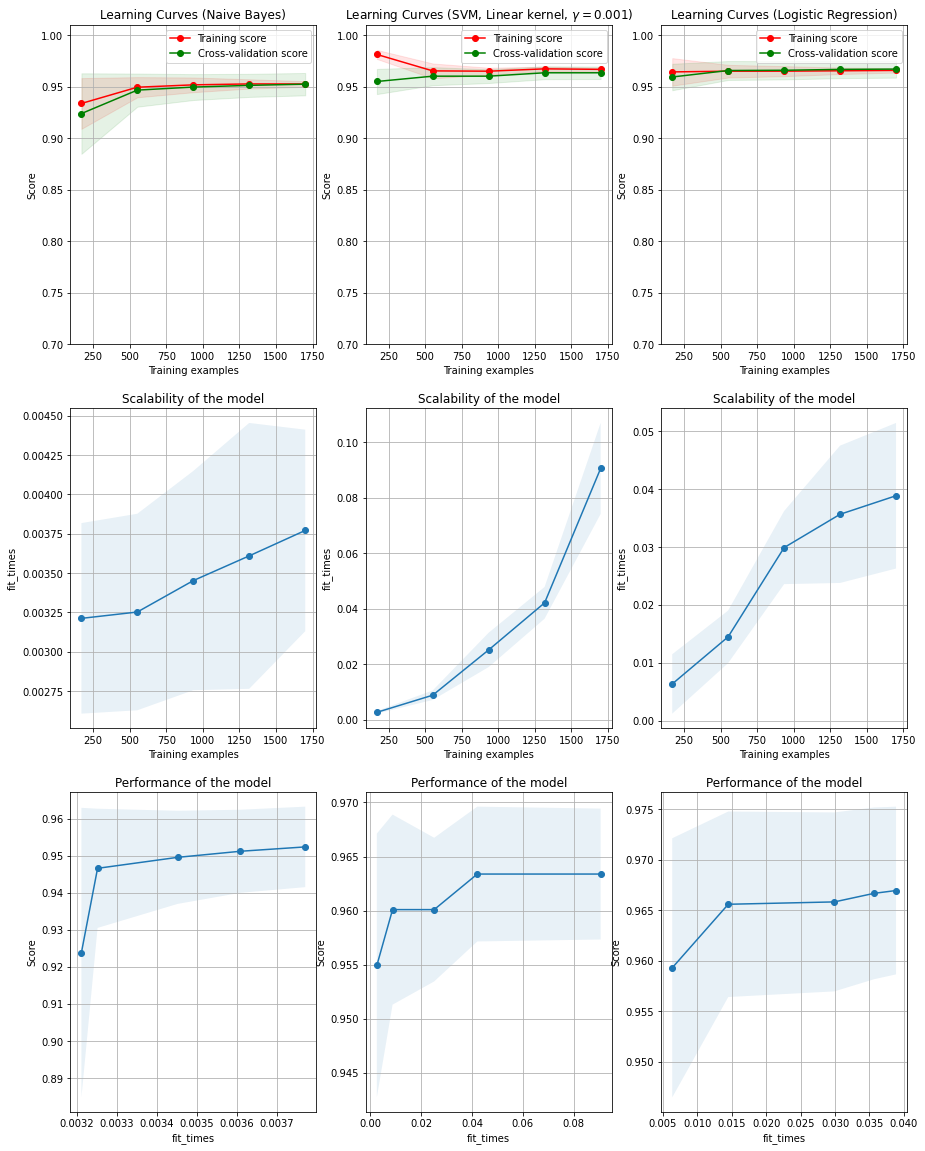

CPU times: total: 3.03 s
Wall time: 6.48 s


In [135]:
%%time
fig, axes = plt.subplots(3, 3, figsize=(15, 20))

# X, y = load_digits(return_X_y=True)

title = "Learning Curves (Naive Bayes)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits= 50, test_size= 0.2, random_state= 0)

estimator = BernoulliNB()
plot_learning_curve(
    estimator, title, new_X, y, axes= axes[:, 0], ylim= (0.7, 1.01), cv= cv, n_jobs= 4
)

# title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
title = r"Learning Curves (SVM, Linear kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits= 5, test_size= 0.2, random_state= 0)
# estimator = svm.SVC(kernel= 'rbf', gamma=0.001)
estimator = svm.SVC(kernel= 'linear', C= 100, gamma= 0.001)
plot_learning_curve(
    estimator, title, new_X, y, axes= axes[:, 1], ylim= (0.7, 1.01), cv= cv, n_jobs= 4
)

title = "Learning Curves (Logistic Regression)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits= 50, test_size= 0.2, random_state= 0)

# estimator = LogisticRegression()
estimator = LogisticRegression(max_iter= 1000, C= 100, penalty= 'l1', solver= 'liblinear')
plot_learning_curve(
    estimator, title, new_X, y, axes= axes[:, 2], ylim= (0.7, 1.01), cv= cv, n_jobs= 4
)

plt.savefig('image07.png', facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

plt.show()

In [136]:
print(arr01, arr02, arr03)

[0.975018201674554, 0.962006044749188, 0.9684093005193923, 426, 'logisticRegression', 11.002779006958008, 0.9637834852250761] [0.975018201674554, 0.962006044749188, 0.9684093005193923, 426, 'supportVectorMachine', 94.79427337646484, 0.9623739298536316] [0.9475117532393075, 0.9509691146397209, 0.9489095963672235, 426, 'naiveBayes', 6.98089599609375, 0.9524948909141122]


In [137]:
modelArr= []
modelArr.append(arr01)
modelArr.append(arr02)
modelArr.append(arr03)

modelArr

[[0.975018201674554,
  0.962006044749188,
  0.9684093005193923,
  426,
  'logisticRegression',
  11.002779006958008,
  0.9637834852250761],
 [0.975018201674554,
  0.962006044749188,
  0.9684093005193923,
  426,
  'supportVectorMachine',
  94.79427337646484,
  0.9623739298536316],
 [0.9475117532393075,
  0.9509691146397209,
  0.9489095963672235,
  426,
  'naiveBayes',
  6.98089599609375,
  0.9524948909141122]]

In [138]:
comparisonCols= ['precision', 'recall', 'f1-score', 'support', 'model', 'runtime (ms)', 'meanAcc']

In [139]:
dfModCompare= pd.DataFrame(modelArr, columns= comparisonCols)
dfModCompare

,precision,recall,f1-score,support,model,runtime (ms),meanAcc
0,0.975018,0.962006,0.968409,426,logisticRegression,11.002779,0.963783
1,0.975018,0.962006,0.968409,426,supportVectorMachine,94.794273,0.962374
2,0.947512,0.950969,0.948910,426,naiveBayes,6.980896,0.952495


In [140]:
modelIndex= dfModCompare.copy(deep=True)
modelIndex.set_index('model', inplace=True)
modelIndex.head()

,precision,recall,f1-score,support,runtime (ms),meanAcc
model,,,,,,
logisticRegression,0.975018,0.962006,0.968409,426,11.002779,0.963783
supportVectorMachine,0.975018,0.962006,0.968409,426,94.794273,0.962374
naiveBayes,0.947512,0.950969,0.948910,426,6.980896,0.952495


In [141]:
modelIndex.iloc[:,[3]]

,support
model,
logisticRegression,426
supportVectorMachine,426
naiveBayes,426


In [142]:
modelIndex.drop(modelIndex.iloc[:,[3]], inplace=True, axis=1)

In [143]:
modelIndex

,precision,recall,f1-score,runtime (ms),meanAcc
model,,,,,
logisticRegression,0.975018,0.962006,0.968409,11.002779,0.963783
supportVectorMachine,0.975018,0.962006,0.968409,94.794273,0.962374
naiveBayes,0.947512,0.950969,0.948910,6.980896,0.952495


In [144]:
compression_opts = dict(method='zip',
                        archive_name='modelComparison.csv')  
modelIndex.to_csv('modelComparison.zip', index=False,
          compression=compression_opts)  

In [145]:
filepath = Path('modelComparison.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
modelIndex.to_csv(filepath)

### Chosen Model

Logistic Regression Model

Implementing the chosen legitimate model, it is able to predict with 96% confidence the status of fetus(s) during pregnancy